In [ ]:
!pip install --upgrade openpyxl
!pip install pandas==1.1.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.5 MB 5.7 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5


## Data input and Visualisation

In [ ]:
import pandas as pd
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 400)

import numpy as np
import matplotlib.pyplot as plt


In [ ]:
mydata=pd.read_excel('/content/drive/MyDrive/2 AI in health care/Data/Medical Data(Categorically int) 4679.xlsx')

FileNotFoundError: ignored

In [ ]:
dictionary = {'Sex': {0: 'M', 1: 'F'},
 'Hypertension': {0: 'Yes', 1: 'No', -1: -1},
 'Diabetes': {0: 'No', 1: 'Yes', -1: -1},
 'Dyslipidemia': {0: 'No', 1: 'Yes', -1: -1},
 'TobaccoUse': {0: 'No', 1: 'Yes', 2: 'Former', -1: -1},
 'PriorPCI': {0: 'Yes', 1: 'No', -1: -1},
 'PriorCABG': {0: 'No', 1: 'Yes', -1: -1},
 'HxHF': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Aspirin': {0: 'No', 1: 'Yes'},
 'PreProcMedAdmin-Beta Blocker': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Statin': {0: 'Yes', -1: -1, 1: 'No', 2: 'Contraindicated'},
 'AccessSite': {0: 'Femoral', 1: 'Radial', 2: 'Brachial', 3: 'Other'},
 'PreProcTnTND': {0: 'Yes', 1: 'No'},
 'Dominance': {0: 'Right', 1: 'Co-dominant', 2: 'Left', -1: -1},
 'PCIStatus': {0: 'Elective', 1: 'Emergency', 2: 'Urgent', -1: -1},
 'PCIIndication': {0: 'PCI for high risk Non-STEMI or unstable angina',
  1: 'PCI for STEMI (Stable, >12 hrs from Sx onset)',
  2: 'PCI for STEMI (Stable after successful full-dose Thrombolysis)',
  3: 'PCI for STEMI (Unstable, >12 hrs from Sx onset)',
  4: 'Immediate PCI for STEMI',
  5: 'Staged PCI',
  6: 'Other',
  7: 'Rescue PCI for STEMI (after failed full-dose lytics)',
  8: 'NSTE - ACS',
  9: 'STEMI - Unstable (> 12 hrs from Sx)',
  10: 'Stable angina',
  11: 'STEMI - Stable (> 12 hrs from Sx)',
  12: 'STEMI (after successful lytics)',
  13: 'New Onset Angina <= 2 months',
  14: 'STEMI - Immediate PCI for Acute STEMI',
  15: 'Other PCI Indication',
  16: 'STEMI - Stable (<= 12 hrs from Sx)',
  17: 'CAD (without ischemic Sx)',
  18: 'STEMI - Rescue (After unsuccessful lytics)'}}

ObjCol = ['Sex', 'Hypertension', 'Diabetes', 'Dyslipidemia', 'TobaccoUse', 'PriorPCI', 'PriorCABG', 'HxHF', 
          'PreProcMedAdmin-Aspirin', 'PreProcMedAdmin-Beta Blocker', 'PreProcMedAdmin-Statin', 'AccessSite', 
          'PreProcTnTND', 'Dominance', 'PCIStatus', 'PCIIndication']

In [ ]:
Alive = mydata.loc[mydata['Discharge_Status'] == 0]
Deceased = mydata.loc[mydata['Discharge_Status'] == 1]

random_state = 42

Alive = Alive.sample(frac=1, random_state=random_state)
Deceased = Deceased.sample(frac=1, random_state=random_state)

In [ ]:
print(Alive.shape)
print(Deceased.shape)

In [ ]:
train = pd.concat([Alive.iloc[:3700,:], Deceased.iloc[:34,:]])


test = pd.concat([Alive.iloc[3700:,:], Deceased.iloc[34:,:]])

train = train.sample(frac=1, random_state=random_state)
test = test.sample(frac=1, random_state=random_state)

In [ ]:
Alive.shape

In [ ]:
X_train=train.drop('Discharge_Status', axis=1)
Y_train=train['Discharge_Status']

X_test=test.drop('Discharge_Status', axis=1)
Y_test=test['Discharge_Status']

In [ ]:
print(X_train.shape)
print(X_test.shape)


In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from lightgbm import LGBMClassifier

# from sklearn.naive_bayes import N
from seaborn import heatmap

## Feature Selection

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X=mydata.drop('Discharge_Status', axis=1)
Y=mydata['Discharge_Status']

In [ ]:
model = RandomForestClassifier()

mmc = MinMaxScaler((-1,1))
scaled_X = mmc.fit_transform(X)

model.fit(scaled_X,Y)
print(sum(model.feature_importances_),'\n',model.feature_importances_)
featureImportance = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(['Importance'],ascending=False)
featureImportance 


0.9999999999999999 
 [0.04935958 0.00743165 0.01444925 0.01121509 0.         0.00352559
 0.00259849 0.00882428 0.00704574 0.0119649  0.01865734 0.02702181
 0.00483004 0.00351255 0.00393236 0.0663432  0.01038982 0.0597342
 0.06852073 0.01548063 0.04908368 0.07709248 0.05638969 0.05248267
 0.03911903 0.00857573 0.14034543 0.1005718  0.01014171 0.02458654
 0.046774  ]


,Importance
PostProcCreat,0.140345
PostProcHgb,0.100572
PreProcCreat,0.077092
PreProcMedAdmin-Statin,0.068521
PreProcLVEF,0.066343
PreProcMedAdmin-Beta Blocker,0.059734
HGB,0.056390
LipidsTC,0.052483
Age,0.049360
FluoroTime,0.049084


In [ ]:
# scaledDataframe = pd.DataFrame(scaled_X)
# scaledDataframe.columns = X.columns
# scaledDataframe.describe()

In [ ]:
# featureImportance.to_excel('/content/drive/MyDrive/2 AI in health care/featureImportance.xlsx', index=True)

In [ ]:
featureImportanceArr = list(featureImportance.index)
print(featureImportanceArr)

['PostProcCreat', 'PostProcHgb', 'PreProcCreat', 'PreProcMedAdmin-Statin', 'PreProcLVEF', 'PreProcMedAdmin-Beta Blocker', 'HGB', 'LipidsTC', 'Age', 'FluoroTime', 'PCIIndication', 'LipidsHDL', 'Stent', 'PCIStatus', 'Vessel', 'AccessSite', 'Hypertension', 'CIRC', 'Diabetes', 'PreProcMedAdmin-Aspirin', 'Dominance', 'RCA', 'PreProcTnTND', 'Sex', 'LAD', 'PriorPCI', 'HxHF', 'TobaccoUse', 'PriorCABG', 'LMCA', 'Dyslipidemia']


In [ ]:
print(", ".join(featureImportanceArr[:15]))

PostProcCreat, PostProcHgb, PreProcCreat, PreProcMedAdmin-Statin, PreProcLVEF, PreProcMedAdmin-Beta Blocker, HGB, LipidsTC, Age, FluoroTime, PCIIndication, LipidsHDL, Stent, PCIStatus, Vessel


In [ ]:
impFeat = 14 # 0 to 14

## Ensembling of all Models in order to get final Results


In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
lr = LogisticRegression(penalty= 'l2', C = 0.2, solver = 'liblinear', class_weight='balanced', random_state=42)

rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)

svc = svm.SVC(C=0.01, kernel='rbf', class_weight='balanced', gamma='scale', random_state=42)

lgbm = LGBMClassifier(class_weight='balanced', max_depth=1, min_child_samples =3,
                              n_estimators=100, boosting_type='gbdt', random_state=42)

voting_clf = VotingClassifier(estimators=[('lr', lr), ('rf', rfc), ('svc', svc), ('lgbm', lgbm)], voting='hard')

impFeat = 15

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3700
           1       0.09      0.82      0.16        34

    accuracy                           0.92      3734
   macro avg       0.54      0.87      0.56      3734
weighted avg       0.99      0.92      0.95      3734

[[3415  285]
 [   6   28]]


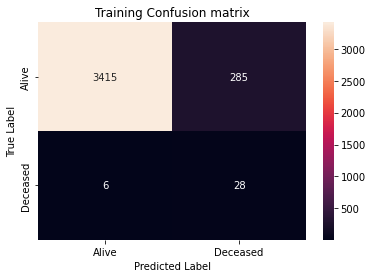

Training Accuracy = 0.9220674879485806
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       925
           1       0.25      0.95      0.39        20

    accuracy                           0.94       945
   macro avg       0.62      0.94      0.68       945
weighted avg       0.98      0.94      0.95       945

[[867  58]
 [  1  19]]


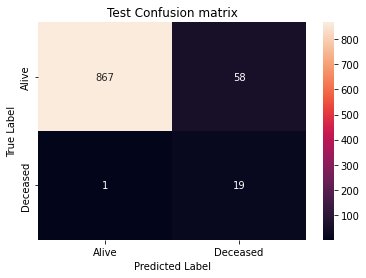

Testing Accuracy = 0.9375661375661376


In [ ]:
impColumn = featureImportanceArr[:impFeat]

X_trainSliced = X_train[impColumn]
X_testSliced = X_test[impColumn]
# StandardScaler
sc = StandardScaler()#(-1,1))
scaled_X_train = sc.fit_transform(X_trainSliced)
scaled_X_test = sc.transform(X_testSliced) # For scaling Test data

voting_clf.fit(scaled_X_train,Y_train)
# cross_validation = cross_val_score(voting_clf,X_train,Y_train,scoring="accuracy",cv=5)
# print(cross_validation)
# print(cross_validation.mean())

predictions = voting_clf.predict(scaled_X_train)
print(classification_report(Y_train,predictions))

cnf_matrix = confusion_matrix(Y_train,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Training Confusion matrix')
plt.show()
print('Training Accuracy = '+str(voting_clf.score(scaled_X_train, Y_train)))

predictions = voting_clf.predict(scaled_X_test)
print(classification_report(Y_test,predictions))

cnf_matrix = confusion_matrix(Y_test,predictions)
print(cnf_matrix)

heatmap(cnf_matrix, annot=True, xticklabels=['Alive', 'Deceased'], yticklabels=['Alive', 'Deceased'], fmt='g')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Test Confusion matrix')
plt.show()

print('Testing Accuracy = '+str(voting_clf.score(scaled_X_test, Y_test)))

In [ ]:
# predictions = predictions.tolist()
# labels = Y_test.to_list()
# labelsIndex = Y_test.index.values.tolist()

# # Indexes where True Label Alive and Predicted Label is Deceased
# # They were discharged 'Alive' but our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==0 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TAPD.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Alive
# # They were discharged 'Deceased' but our model has predicted them 'Alive'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==0):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TDPA.xlsx', index=False)

# # Indexes where True Label Deceased and Predicted Label is Deceased
# # They were discharged 'Deceased' and our model has predicted them 'Deceased'
# requiredLabels = []
# for i in range(len(labels)):
#   if(labels[i]==1 and predictions[i]==1):
#     requiredLabels.append(labelsIndex[i])

# requiredDataframe = X_test.loc[requiredLabels]

# for col in ObjCol:
#     dict = dictionary.get(col)
#     requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
# requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
# requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TDPD.xlsx', index=False)

## Best Model Parameters

In [ ]:
'''
SVM 
svc = svm.SVC(C=0.05, kernel='rbf', class_weight='balanced', gamma='scale')

Random Forest
# For ALl features
rfc = RandomForestClassifier(class_weight='balanced', max_depth=1, min_samples_leaf=1, 
                             min_samples_split=5, n_estimators=200, random_state=42)

Logistic Regression
lr = LogisticRegression(class_weight='balanced', random_state=42)

'''

## Getting Confusion Matrix Data

In [ ]:
predictions = predictions.tolist()
labels = Y_test.to_list()
labelsIndex = Y_test.index.values.tolist()

In [ ]:
dictionary = {'Sex': {0: 'M', 1: 'F'},
 'Hypertension': {0: 'Yes', 1: 'No', -1: -1},
 'Diabetes': {0: 'No', 1: 'Yes', -1: -1},
 'Dyslipidemia': {0: 'No', 1: 'Yes', -1: -1},
 'TobaccoUse': {0: 'No', 1: 'Yes', 2: 'Former', -1: -1},
 'PriorPCI': {0: 'Yes', 1: 'No', -1: -1},
 'PriorCABG': {0: 'No', 1: 'Yes', -1: -1},
 'HxHF': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Aspirin': {0: 'No', 1: 'Yes'},
 'PreProcMedAdmin-Beta Blocker': {0: 'No', 1: 'Yes', -1: -1},
 'PreProcMedAdmin-Statin': {0: 'Yes', -1: -1, 1: 'No', 2: 'Contraindicated'},
 'AccessSite': {0: 'Femoral', 1: 'Radial', 2: 'Brachial', 3: 'Other'},
 'PreProcTnTND': {0: 'Yes', 1: 'No'},
 'Dominance': {0: 'Right', 1: 'Co-dominant', 2: 'Left', -1: -1},
 'PCIStatus': {0: 'Elective', 1: 'Emergency', 2: 'Urgent', -1: -1},
 'PCIIndication': {0: 'PCI for high risk Non-STEMI or unstable angina',
  1: 'PCI for STEMI (Stable, >12 hrs from Sx onset)',
  2: 'PCI for STEMI (Stable after successful full-dose Thrombolysis)',
  3: 'PCI for STEMI (Unstable, >12 hrs from Sx onset)',
  4: 'Immediate PCI for STEMI',
  5: 'Staged PCI',
  6: 'Other',
  7: 'Rescue PCI for STEMI (after failed full-dose lytics)',
  8: 'NSTE - ACS',
  9: 'STEMI - Unstable (> 12 hrs from Sx)',
  10: 'Stable angina',
  11: 'STEMI - Stable (> 12 hrs from Sx)',
  12: 'STEMI (after successful lytics)',
  13: 'New Onset Angina <= 2 months',
  14: 'STEMI - Immediate PCI for Acute STEMI',
  15: 'Other PCI Indication',
  16: 'STEMI - Stable (<= 12 hrs from Sx)',
  17: 'CAD (without ischemic Sx)',
  18: 'STEMI - Rescue (After unsuccessful lytics)'}}

ObjCol = ['Sex', 'Hypertension', 'Diabetes', 'Dyslipidemia', 'TobaccoUse', 'PriorPCI', 'PriorCABG', 'HxHF', 
          'PreProcMedAdmin-Aspirin', 'PreProcMedAdmin-Beta Blocker', 'PreProcMedAdmin-Statin', 'AccessSite', 
          'PreProcTnTND', 'Dominance', 'PCIStatus', 'PCIIndication']

In [ ]:
print(labels)
print(labelsIndex)
print(predictions) # Alive = 0, Deceased = 1

[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
# Indexes where True Label Alive and Predicted Label is Deceased
# They were discharged 'Alive' but our model has predicted them 'Deceased'
requiredLabels = []
for i in range(len(labels)):
  if(labels[i]==0 and predictions[i]==1):
    requiredLabels.append(labelsIndex[i])

requiredDataframe = X_test.loc[requiredLabels]

for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TAPD.xlsx', index=False)

In [ ]:
# Indexes where True Label Deceased and Predicted Label is Alive
# They were discharged 'Deceased' but our model has predicted them 'Alive'
requiredLabels = []
for i in range(len(labels)):
  if(labels[i]==1 and predictions[i]==0):
    requiredLabels.append(labelsIndex[i])

requiredDataframe = X_test.loc[requiredLabels]

for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TDPA.xlsx', index=False)

In [ ]:
# Indexes where True Label Deceased and Predicted Label is Deceased
# They were discharged 'Deceased' and our model has predicted them 'Deceased'
requiredLabels = []
for i in range(len(labels)):
  if(labels[i]==1 and predictions[i]==1):
    requiredLabels.append(labelsIndex[i])

requiredDataframe = X_test.loc[requiredLabels]

for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TDPD.xlsx', index=False)

In [ ]:
# print(len(requiredLabels))
# print(requiredLabels)

19
[2116, 3809, 922, 1960, 3665, 1064, 3748, 3350, 4284, 2189, 120, 2467, 3830, 1991, 4619, 3943, 1402, 232, 3579]


In [ ]:
requiredDataframe = X_test.loc[requiredLabels]

In [ ]:
for col in ObjCol:
    dict = dictionary.get(col)
    requiredDataframe[col].replace(dict, inplace=True) # Replacing labels with number
requiredDataframe.replace(to_replace=-1, value='NA', inplace=True)

In [ ]:
requiredDataframe.to_excel('/content/drive/MyDrive/2 AI in health care/EM_TAPD.xlsx', index=False)

In [ ]:
requiredDataframe

,Age,Sex,Hypertension,Diabetes,Dyslipidemia,TobaccoUse,LMCA,RCA,LAD,CIRC,Vessel,Stent,PriorPCI,PriorCABG,HxHF,PreProcLVEF,PreProcMedAdmin-Aspirin,PreProcMedAdmin-Beta Blocker,PreProcMedAdmin-Statin,AccessSite,FluoroTime,PreProcCreat,HGB,LipidsTC,LipidsHDL,PreProcTnTND,PostProcCreat,PostProcHgb,Dominance,PCIStatus,PCIIndication
3899,55,M,Yes,No,No,No,0,1,1,0,2,2,No,No,No,40,Yes,Yes,Yes,Radial,11.0,3.71,8.6,NA,NA,Yes,3.61,8.2,Right,Elective,NSTE - ACS
2933,83,M,Yes,No,No,No,0,0,0,1,1,1,No,No,No,45,Yes,Yes,Yes,Radial,27.0,1.26,9.9,151,37,Yes,1.04,9.7,Right,Elective,STEMI - Unstable (> 12 hrs from Sx)
3595,54,M,Yes,Yes,No,No,0,1,1,0,2,2,No,No,No,30,Yes,Yes,Yes,Radial,21.0,0.86,12.6,115,25,Yes,0.82,12.8,Right,Elective,CAD (without ischemic Sx)
3535,68,M,Yes,Yes,No,Former,0,1,0,0,1,1,No,No,No,35,Yes,Yes,Yes,Radial,18.0,1.51,10.3,216,33,Yes,2.16,10.9,Right,Elective,STEMI - Unstable (> 12 hrs from Sx)
4609,69,M,Yes,No,No,No,0,0,0,1,1,1,No,No,No,30,No,No,No,Radial,11.0,1.95,14.3,164,25,Yes,2.26,11.3,Right,Urgent,STEMI - Immediate PCI for Acute STEMI
4628,81,F,Yes,Yes,No,No,0,0,1,1,2,1,Yes,No,No,55,No,Yes,Yes,Femoral,35.0,1.46,13.1,110,31,Yes,1.78,8.1,Right,Elective,Other PCI Indication
3713,51,M,No,No,No,No,0,0,1,1,2,1,No,No,No,30,Yes,Yes,Yes,Radial,7.0,1.69,11.3,114,35,Yes,1.39,10.4,Right,Elective,NSTE - ACS
3472,76,M,No,No,No,No,0,1,0,1,2,1,No,No,No,35,Yes,No,Yes,Femoral,17.0,0.92,12.8,121,19,Yes,0.99,12.6,Right,Elective,CAD (without ischemic Sx)
4168,61,M,Yes,Yes,No,No,0,0,0,1,1,1,No,Yes,No,20,Yes,Yes,Yes,Femoral,38.0,1.26,13.7,87,24,Yes,1.28,13.0,Right,Elective,NSTE - ACS
145,65,F,No,No,No,No,0,0,1,1,2,1,No,No,No,30,No,No,Yes,Radial,24.0,1.60,13.0,NA,NA,Yes,1.50,10.9,Left,Elective,PCI for STEMI (Stable after successful full-dose Thrombolysis)


## Code

In [ ]:
train_predictions = voting_clf.predict(scaled_X_train)
test_predictions = voting_clf.predict(scaled_X_test)
len(train_predictions)

4196

In [ ]:
new_train = train
new_test = test
new_train['predictions'] = train_predictions
new_test['predictions'] = test_predictions

In [ ]:
new_train = new_train[new_train['Discharge_Status']==1]
new_test = new_test[new_test['Discharge_Status']==1]

corr_train_predictions = new_train[new_train['Discharge_Status']==new_train['predictions']]
corr_test_predictions = new_test[new_test['Discharge_Status']==new_test['predictions']]

print(corr_train_predictions.shape)
print(corr_test_predictions.shape)

(30, 33)
(19, 33)


In [ ]:
col = 'Diabetes'
print(corr_train_predictions[corr_train_predictions[col]==1].shape)
print(train[(train[col]==1) & (train['Discharge_Status']==1)].shape)

print(corr_test_predictions[corr_test_predictions[col]==1].shape)
print(test[(test[col]==1) & (test['Discharge_Status']==1)].shape)

# (1424, 33)
# (1581, 33)
# (174, 33)
# (189, 33)

(15, 33)
(18, 33)
(5, 33)
(6, 33)


In [ ]:
new_test = new_test[new_test['Discharge_Status']==1]

In [ ]:
col = 'Age'
print(corr_train_predictions[corr_train_predictions[col]>50].shape)
print(train[(train[col]>50) & (train['Discharge_Status']==1)].shape)

print(corr_test_predictions[corr_test_predictions[col]>50].shape)
print(test[(test[col]>50) & (test['Discharge_Status']==1)].shape)

# (619, 33)
# (649, 33)
# (71, 33)
# (72, 33)

(26, 33)
(29, 33)
(15, 33)
(16, 33)


In [ ]:
corr_train_predictions

In [ ]:
mydata.columns

Index(['Age', 'Sex', 'Hypertension', 'Diabetes', 'Dyslipidemia', 'TobaccoUse',
       'LMCA', 'RCA', 'LAD', 'CIRC', 'Vessel', 'Stent', 'PriorPCI',
       'PriorCABG', 'HxHF', 'PreProcLVEF', 'PreProcMedAdmin-Aspirin',
       'PreProcMedAdmin-Beta Blocker', 'PreProcMedAdmin-Statin', 'AccessSite',
       'FluoroTime', 'PreProcCreat', 'HGB', 'LipidsTC', 'LipidsHDL',
       'PreProcTnTND', 'PostProcCreat', 'PostProcHgb', 'Dominance',
       'PCIStatus', 'PCIIndication', 'Discharge_Status'],
      dtype='object')

In [ ]:
col = 'Diabetes'
print(train[col].value_counts())
print(test[col].value_counts())
print(train[train.Discharge_Status==1][col].value_counts())
print(test[test.Discharge_Status==1][col].value_counts())
print(mydata[col].value_counts())

# print(train[col].mean())
# print(test[col].mean())
# print(train[train.Discharge_Status==1][col].mean())
# print(test[test.Discharge_Status==1][col].mean())
# print(mydata[col].mean())

 0    2614
 1    1581
-1       1
Name: Diabetes, dtype: int64
0    294
1    189
Name: Diabetes, dtype: int64
1    18
0    16
Name: Diabetes, dtype: int64
0    14
1     6
Name: Diabetes, dtype: int64
 0    2908
 1    1770
-1       1
Name: Diabetes, dtype: int64


In [ ]:
l=np.arange(0,10)
l

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
l[:6]

array([0, 1, 2, 3, 4, 5])

## Loop for finding Hyper Parameters of Random Forest

In [ ]:
cross_validation_scores = [] # Cross Validation Score
train_confus_matrix = [] # Confusion Matrix
test_confus_matrix = [] # Confusion Matrix
test_score = [] # Test Score

In [ ]:
sc = MinMaxScaler((-1,1))
scaled_X_train = sc.fit_transform(X_train)
scaled_X_test = sc.transform(X_test)

i=1
for n_estimators in [100, 200]:
  for min_samples_split in [2, 5, 10]:
    for min_samples_leaf in [1, 2, 4]:
      for max_depth in [1,2]:

          rfc = RandomForestClassifier(class_weight='balanced', max_depth=max_depth, min_samples_leaf=min_samples_leaf, 
                                      min_samples_split=min_samples_split, n_estimators=n_estimators, random_state=42)
          rfc.fit(scaled_X_train,Y_train)
          cross_validation = cross_val_score(rfc,scaled_X_train,Y_train,scoring="accuracy",cv=5)
          cross_validation_scores.append(cross_validation.mean())
          i+=1
          print(i, end=', ')
          predictions = rfc.predict(scaled_X_train)

          train_confus_matrix.append(confusion_matrix(Y_train.values,predictions))
          test_confus_matrix.append(confusion_matrix(Y_test.values,rfc.predict(scaled_X_test)))

          test_score.append(rfc.score(scaled_X_test, Y_test))

1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 

In [ ]:
print(cross_validation_scores)
print(train_confus_matrix)
print(test_confus_matrix)
print(test_score)

In [ ]:
len(train_confus_matrix)

36

In [ ]:
trA_percentage = []
trD_percentage = []
teA_percentage = []
teD_percentage = []

for matrix in test_confus_matrix:
  teD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  teA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

for matrix in train_confus_matrix:
  trD_percentage.append(100*matrix[1,1]/(matrix[1,1]+matrix[1,0]))
  trA_percentage.append(100*matrix[0,0]/(matrix[0,1]+matrix[0,0]))

In [ ]:
parameters = []
for n_estimators in [100, 200]:
  for min_samples_split in [2, 5, 10]:
    for min_samples_leaf in [1, 2, 4]:
      for max_depth in [1,2]:
        dictonary = {'n_estimators': n_estimators, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 
                            'max_depth': max_depth} 
        parameters.append(dictonary)

In [ ]:
Acc_Table = pd.DataFrame({"Parameters":parameters, "Train Alive Accuracy":trA_percentage, 
                                   "Train Deceased Accuracy":trD_percentage, "Test Alive Accuracy":teA_percentage, 
                                   "Test Deceased Accuracy":teD_percentage, "Test Accuracy":test_score}).sort_values(['Test Deceased Accuracy'],ascending=False)
# Acc_Table.to_csv("/content/drive/MyDrive/2 AI in health care/Random Forest Accuracy for top 5 features.csv", index=False)

In [ ]:
Acc_Table

,Parameters,Train Alive Accuracy,Train Deceased Accuracy,Test Alive Accuracy,Test Deceased Accuracy,Test Accuracy
0,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 1}",93.135135,76.470588,94.810811,85.0,0.946032
1,"{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 2}",94.351351,82.352941,95.243243,85.0,0.950265
20,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 1}",93.135135,76.470588,94.702703,85.0,0.944974
21,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 2}",94.675676,82.352941,95.567568,85.0,0.953439
22,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 1}",93.081081,76.470588,94.702703,85.0,0.944974
23,"{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 2}",94.540541,82.352941,95.459459,85.0,0.952381
24,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 1}",93.135135,76.470588,94.702703,85.0,0.944974
25,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 2}",94.702703,82.352941,95.567568,85.0,0.953439
26,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 1}",93.135135,76.470588,94.702703,85.0,0.944974
27,"{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 2}",94.675676,82.352941,95.567568,85.0,0.953439
